In [56]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Statistical Learning Excercises

#### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

***(a) The sample size n is extremely large, and the number of predictors p is small.***

>In this case, I would favor a more flexible method because it can make use of the large n to glean extra information with minimal risk (given the low number of predictors, so less opportunity for overfitting)

***(b) The number of predictors p is extremely large, and the number of observations n is small.***

>In this case, where models are particular susceptible to overfitting/learning noise in the data, I would favor a less flexible method.

***(c) The relationship between the predictors and response is highly non-linear.***

>In this case, a more flexible model that does not make any assumptions of an underlying functional form would likely outperform an inflexible method.

***(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.***
>I would expect an inflexible model to perform better here, as the more flexible models may be increasingly more likely to overfit the noise as the variance increases.

#### 2. Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

***(a) We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.***

>This is regression; the target, CEO salary, is a continuous variable.  We are interested in inference, meaning we are less concerned with the particular predictions, and more with the factors associated with inreased or decreased CEO salary. n = # of firms = 500; p = # of predictors = 3

***(b) We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.***

>This is classication; we are trying to make a binary determination of success or failure.  The goal here is prediction since we are more interested in the predictions themselves and less about the relationship between features and the output. n = 20, p = 13

***(c) We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the USD/Euro, the % change in the US market, the % change in the British market, and the % change in the German market.***

>This is regression for prediction.  We are trying to predict % change, a continuous value, and the goal is to predict, not understand the exact relationship between features and target. n = 52 (one observation per week), p = 3.

#### 3. We now revisit the bias-variance decomposition.

***(a) Provide a sketch of typical (squared) bias, variance, training er- ror, test error, and Bayes (or irreducible) error curves, on a sin- gle plot, as we go from less flexible statistical learning methods towards more flexible approaches. The x-axis should represent the amount of flexibility in the method, and the y-axis should represent the values for each curve. There should be five curves. Make sure to label each one.***

<img src="../figures/2_3a.jpg" alt="flexibility" width="600px"/>

***(b) Explain why each of the five curves has the shape displayed in part (a).***
>bias: high for inflexible approach...we are making an assumption of the structure of the problem and complexity of the underlying decision boundary.  decreases as the approach gets more flexible/we relax assumptions about the data.

>variance: low for inflexible approaches which is not overly sensitive to individual points or outliers. increases as model flexibility increases

>training error: this will decrease with model flexibility, since we can fit the training data more closely as we increase model flexibility (thought this likely will lead to overfitting on the _test_ error)

> test error: depends on the problem, but can expect U-shape...initially increase flexibility allows the model to learn more relationships from the data, but past a certain point, and the model will be learning idiosyncracies of the training data and will not improve (and might even get worse) on the test dataset.

> irreducible error: this is independent of the model type and provides a lower bound on model performance

#### 4. You will now think of some real-life applications for statistical learning.

***(a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.***
>1. Identifying customers likely to spend money at a store.  Here, the response is "Spent over $100" and we will use available demographic and shopping pattern data from potential customers (e.g. age, gender, money spent on clothes over the past month).  This model could be useful for both prediction and inference (identifying factors associated with store spending that could guide sales or marketing effors), but if the specific goal is to identify customers, the model will primarily be for inference.

>2. Identifying patients likely to have a particular chronic disease.  The response is a boolean indicator of hasCondition?, and the features are an individual's demographics, drugs they take, and biometric data.  Here, the goal is prediction, as we would like to assist doctors with diagnosis of particular cases (rather than, say, understanding what features are associated with the condition, for public health purposes, for example).

>3. A company wants to understanding factors related to which users are still on the site in three months.  In this case, the classification model is trying to predict the binary indicator stillActive3Months?, which indicates whether a particualr user is still active on the platform in three months.  The features will be information associated with the user such as memberSince, friends, messages sent in last week, etc.  Here, the goal is inference, as we are trying to identify features that are associated with users leaving our site (so that we can direct efforts to mitigating or reversing churn).

***(b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.***
>1. Trying to predict next year's health spending.  The response is a $ value of next year's spending, and the features are the individual's age, demographics, and prescriptions.  The goal here is prediction; we are focused on the estimate itself, with less concern for the reasons behind it.

>2. Trying to predict the number of newspaper subscribers based on advertising data (e.g. radio, newspaper, video).  The response is a count of subscribers. The goal here is inference; we want to know which advertising channels are most associated with increased subscribers (as ooposed to wanting to estimate the number of subscribers next year).

>3. A restaurant predicting the number of customers on a given night.  In this case, the response is a count of customers.  The predictors are day of week, month, predicted weather, and customers over the past week.  The goal here is prediction; the restaurant wants to estimate the number of customers on a new day in the future, so they can plan staff accordingly.

***(c) Describe three real-life applications in which cluster analysis might be useful.***
>1. We have a large database of medical claims records, and want to group together individuals w/ similar utilization

>2. We have user preference data for hundreds of thousands of users and thousands of movies.  We might want to cluster our users, to identify groups of individuals with similar tastes (and we could use these "people like you" to recommend _new_ movies for you)

>3. We have a database of hundreds of thousands of recipes, and we want to identify broad categories of recipe, so we can organize our data more meaningfully.

#### 5. What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

>Flexible approaches allow us to learn highly irregular or non-linear decision boundaries, and we do not need to assume an underlying functional form.  A disadvantage is that flexible methods have greater risk of overfitting the data and trying to learn patterns from noise.
>
>A more flexible approach might be preferred if there is significant non-linearity in the data and we have a large number of observations.  However, a less flexible approach may be preferred if there is siginificant noise in the response variable or we have a small number of observations.
>
>Additionally, a flexible approach might be preferred if the goal is prediction, whereas a less flexible approach might be favored if the goal is inference and we want more interpretable results (though I would argue more flexible is not always less interpretable).

#### 6. Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a para- metric approach to regression or classification (as opposed to a non- parametric approach)? What are its disadvantages?

>A parametric model the problem to learning a set of parameters of a particular function (e.g. linear regression coefficients), whereas non-parametric approaches do not assume a particular functional form.
Advantages of a parametric approach are that they can have significantly lower variance (because the assumption of a particular functional form will make the model less sensitive to particular data points or outliers, decreasing model variance).  A disadvantage is the increased bias; assuming a certain functional form limits the complexity of decision boundaries, and your assumed form may be insufficient for some problems.  
>
>A non-parametrics approach may be preferred if the data is highly non-linear/decision boundary is highly irregular, or we have large amounts of data and a relatively small number of predictors.  A disadvantage of these approaches can be high variance and greater likelihood of overfitting as the model is flexible enough to learn from noise in the data.



#### 7. The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.

|Obs. |X1 |X2| X3| Y|
|---|---|---|---|---|
|1| 0|3|0| Red|
|2| 2|0|0| Red|
|3| 0|1|3| Red|
|4| 0|1|2| Green|
|5| −1|0|1| Green|
|6| 1|1|1|Red|

***(a) Compute the Euclidean distance between each observation and the test point, X1 =X2 =X3 =0.***

In [3]:
training_data = pd.DataFrame([
    [1, 0, 3, 0, 'Red'],
    [2, 2, 0, 0, 'Red'],
    [3, 0, 1, 3, 'Red'],
    [4, 0, 1, 2, 'Green'],
    [5, -1, 0, 1, 'Green'],
    [6, 1, 1, 1, 'Red']
], columns=['Obs.', 'X1', 'X2', 'X3', 'Y']).set_index('Obs.')

training_data

,X1,X2,X3,Y
Obs.,,,,
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [14]:
def get_distance(training_data, new_sample):
    distance = ((training_data[['X1', 'X2', 'X3']] - new_sample)**2).sum(axis=1).apply(np.sqrt)
    return distance

In [16]:
test_point = [0, 0, 0]

print "Euclidean distance of point {}".format(test_point)
get_distance(training_data, test_point)

Euclidean distance of point [0, 0, 0]


Obs.
1    3.000000
2    2.000000
3    3.162278
4    2.236068
5    1.414214
6    1.732051
dtype: float64

***(b) What is our prediction with K = 1? Why?***

In [52]:
def get_pred(training_data, test_sample, k=1):
    distances = get_distance(training_data, test_sample)
    distances.sort_values(ascending=True, inplace=True)
    print "Distances from training data to test point"
    print distances
    
    return training_data.loc[distances.iloc[:k].index, 'Y'].value_counts().index[0]

In [55]:
# observation 5 is closest to test point, and Y='Green' for obs. 5

'Prediction for k = 1 is "{}"'.format(get_pred(training_data, test_point, k=1))

Distances from training data to test point
Obs.
5    1.414214
6    1.732051
2    2.000000
4    2.236068
1    3.000000
3    3.162278
dtype: float64


'Prediction for k = 1 is "Green"'

***(c) What is our prediction with K = 3? Why?***

In [56]:
# Top 3 closest points are observation 5, 6, and 2. 6 and 2 have color Red, so the modal value/prediction is Red

'Prediction for k = 3 is "{}"'.format(get_pred(training_data, test_point, k=3))

Distances from training data to test point
Obs.
5    1.414214
6    1.732051
2    2.000000
4    2.236068
1    3.000000
3    3.162278
dtype: float64


'Prediction for k = 3 is "Red"'

***(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?***

>In this case, I would favor a smaller value of K, since increasing K smooths our prediction across many nearby points, which also has the effect of making the model _less_ sensitive to non-linear perturbations in the data (desirable if the data is very noisy, but not if there are truly significant non-linearities in the underlying problem).

## Applied

#### 8. This exercise relates to the College data set, which can be found in the file College.csv.

***(a) Use the read.csv() function to read the data into R. Call the loaded data college. Make sure that you have the directory set to the correct location for the data.***

***(b) Look at the data using the fix() function. You should notice that the first column is just the name of each university.***

In [5]:
college = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/College.csv').set_index('Unnamed: 0')
college.index.name = 'school_name'
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
school_name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


***c***

##### i. Use the summary() function to produce a numerical summary of the variables in the data set.***

In [8]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


##### ii. Use the pairs() function to produce a scatterplot matrix of the first ten columns or variables of the data. Recall that you can reference the first ten columns of a matrix A using A[,1:10].

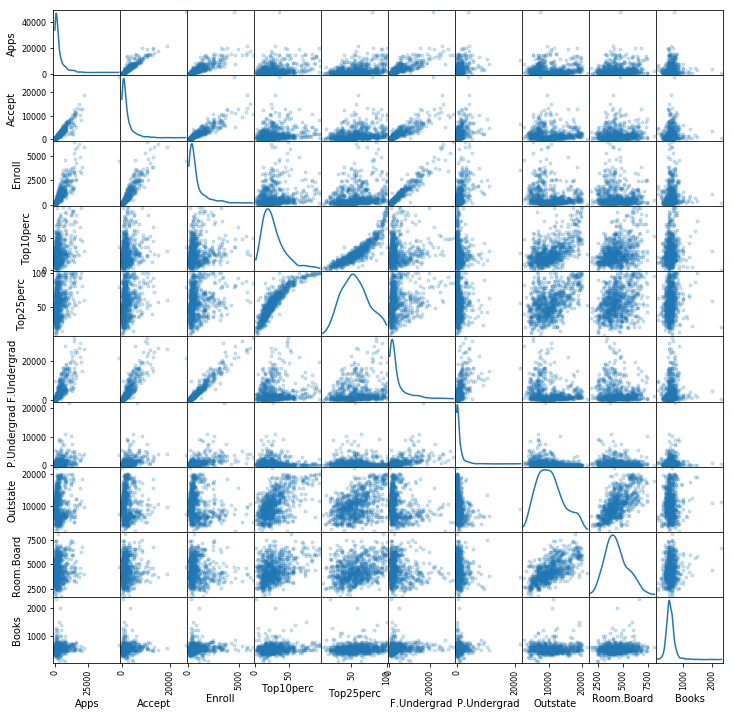

In [19]:
_ = pd.scatter_matrix(college.loc[:,college.columns[:11]], alpha=0.2, figsize=(12, 12), diagonal='kde')

##### iii. Use the plot() function to produce side-by-side boxplots of Outstate versus Private.

[Text(0,0.5,'Out of State Tuition ($)'),
 Text(0.5,1,'Out of State Tuition by Public/Private')]

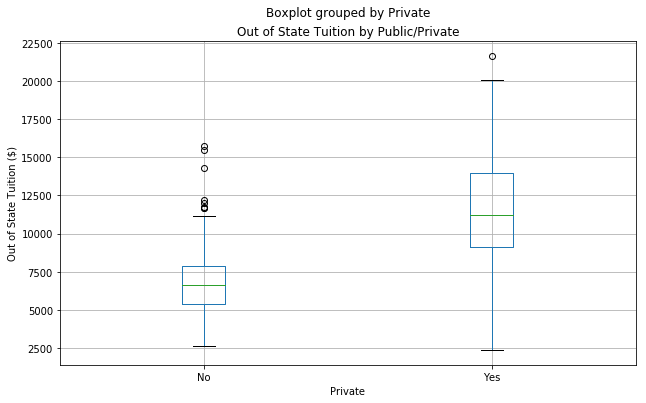

In [59]:
c = college.columns[1]
_ = college.boxplot(column='Outstate', by='Private', figsize=(10, 6))
plt.gca().set(ylabel="Out of State Tuition ($)", title='Out of State Tuition by Public/Private')

##### iv Create a new qualitative variable, called Elite, by binning the Top10perc variable. 

We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50 %.
> Elite=rep("No",nrow(college))

> Elite[college$Top10perc >50]="Yes"

> Elite=as.factor(Elite)

> college=data.frame(college ,Elite)

Use the summary() function to see how many elite univer- sities there are. Now use the plot() function to produce side-by-side boxplots of Outstate versus Elite.

In [64]:
college['Elite'] = (college['Top10perc'] > 50).astype(int)
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.100386
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.300708
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,0.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,0.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000
